# iris dataset feature engineering and eda 

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#downloading a dataset called iris raw, this is just sample dataset
data = pd.read_csv('iris_raw.csv')

In [3]:
data.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.20,3.28,1.42,0.90,virginica
1,6.38,3.04,5.57,0.77,setosa
2,7.64,NaN,3.55,0.41,versicolor
3,6.66,2.76,5.54,0.17,virginica
4,4.28,3.35,3.76,1.52,versicolor


In [4]:
#data rows and cols
data.shape

(120, 5)

rows/observation= 120 
,
cols/features/variable = 5

In [5]:
#copying a dataset
df = data.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  120 non-null    float64
 1   SepalWidth   112 non-null    float64
 2   PetalLength  120 non-null    float64
 3   PetalWidth   120 non-null    float64
 4   Species      120 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.8+ KB


# info()
one string and four float

In [7]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,120.000000,112.000000,120.000000,120.000000
mean,5.787333,3.038036,3.727833,1.055167
std,0.842504,0.369238,1.526520,0.535192
min,3.500000,2.100000,0.100000,-0.000000
25%,5.147500,2.787500,2.730000,0.660000
50%,5.825000,3.030000,3.860000,1.020000
75%,6.390000,3.242500,4.722500,1.482500
max,7.640000,4.070000,7.800000,2.440000


In [8]:
#checking for null value
df.isna().sum()

SepalLength    0
SepalWidth     8
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

# null
sepalWidth  = 8
<br>
droping the null rows won't affect the rows. i go for filling those null values because it is continuous value of type float.

In [9]:
#seeing the null rows
df[df['SepalWidth'].isna()].index

Index([2, 13, 33, 44, 59, 71, 76, 95], dtype='int64')

# null rows in sepalwidth
Index([2, 13, 33, 44, 59, 71, 76, 95])

# checking for mean ,median and mode 
fill those null values with any central tendency

In [10]:
print('mean:', df['SepalWidth'].mean())
print('med:', df['SepalWidth'].median())
print('mode:', df['SepalWidth'].mode()[0])

mean: 3.0380357142857144
med: 3.03
mode: 2.98


In [11]:
#fill with the mean
df['SepalWidth'] = df['SepalWidth'].fillna(df['SepalWidth'].mean())

In [12]:
df.isna().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [13]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.20,3.280000,1.42,0.90,virginica
1,6.38,3.040000,5.57,0.77,setosa
2,7.64,3.038036,3.55,0.41,versicolor
3,6.66,2.760000,5.54,0.17,virginica
4,4.28,3.350000,3.76,1.52,versicolor


In [14]:
#checking for outliers graphically
num_col = [col for col in df.columns if df[col].dtypes != 'object']
num_col

['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

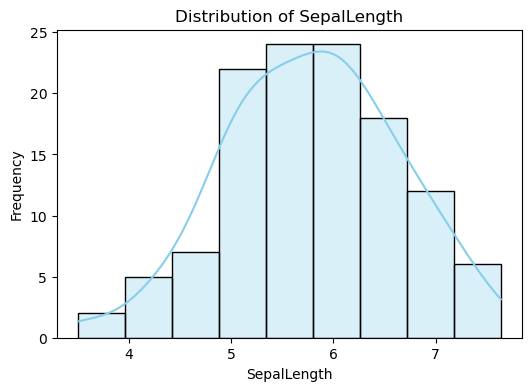

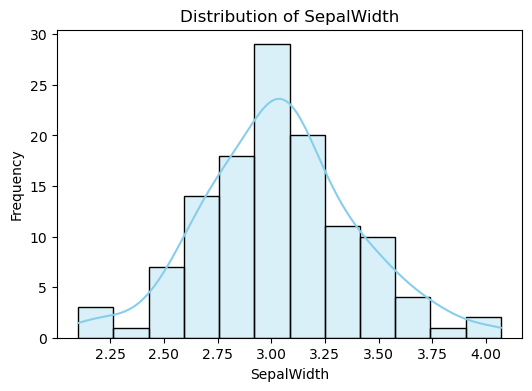

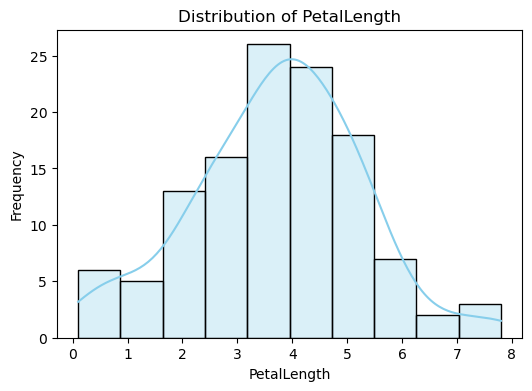

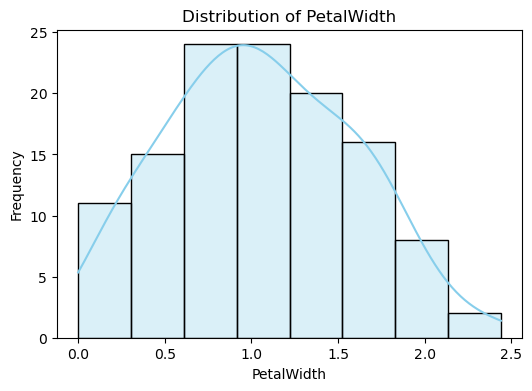

In [15]:


for col in num_col:  # numeric columns only
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, alpha=0.3, color='skyblue')

    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.savefig(f'disribution {col}')
    plt.show()


In [16]:
df[num_col].std()

SepalLength    0.842504
SepalWidth     0.356611
PetalLength    1.526520
PetalWidth     0.535192
dtype: float64

In [17]:
#relative std
#formula std/mean * 100
for col in num_col:
    relative_std = round((df[col].std()/df[col].mean()) * 100, 2)
    print(f'relative std for {col}: {relative_std}%')

relative std for SepalLength: 14.56%
relative std for SepalWidth: 11.74%
relative std for PetalLength: 40.95%
relative std for PetalWidth: 50.72%


# 
reason for the diff in histogram variation and std
1. In histogram, PetalWidth has more variation due to the relative std or say the variation in between mean and std.
2. in calculation of standard deviation, PetalLength has more variation.
3. realtive std tell how the data is spread or clustered
4. petalwidth has relatively high cv , means more spread than others and less consisent
5. comparitively, sepal width and sepal length is more clustered to the mean, more consistency
6. petal length has more actual vaiability , petal width has more variability around the mean


In [18]:
#calculting the actual variance
for c in num_col:
    print(f'variance in {c}: {round(np.square(df[c].std()),2)}')

variance in SepalLength: 0.71
variance in SepalWidth: 0.13
variance in PetalLength: 2.33
variance in PetalWidth: 0.29


In [19]:
df[num_col].skew()

SepalLength   -0.135150
SepalWidth     0.159437
PetalLength   -0.107890
PetalWidth     0.163849
dtype: float64

# skewness
1. all has nearly equal to 0, meaning there is not such skewness in the data


In [20]:
# adding a new fiture just to imagine what will the average size of each flowers look
df['size'] = df['SepalLength']*2 +df['PetalLength']*4+df['SepalWidth']+df['PetalWidth']

In [21]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,size
0,6.20,3.280000,1.42,0.90,virginica,22.260000
1,6.38,3.040000,5.57,0.77,setosa,38.850000
2,7.64,3.038036,3.55,0.41,versicolor,32.928036
3,6.66,2.760000,5.54,0.17,virginica,38.410000
4,4.28,3.350000,3.76,1.52,versicolor,28.470000


In [22]:
#value counts of each species
df['Species'].value_counts()

Species
virginica     48
setosa        36
versicolor    36
Name: count, dtype: int64

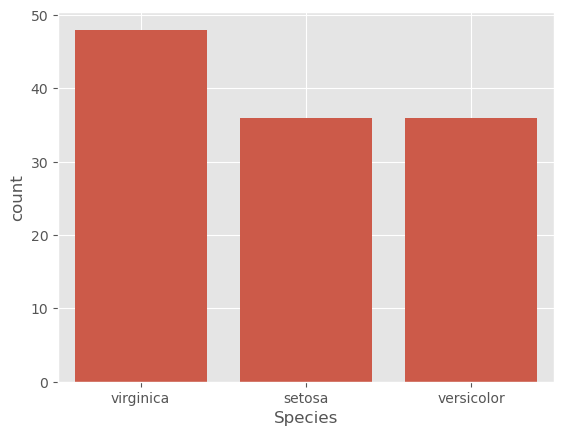

In [23]:
plt.style.use('ggplot')
sns.countplot(x='Species', data=df) 
plt.grid(True)

plt.savefig('species')
plt.show()


# obervation
1. virginica has more counts.
2. setosa and versicolor has almost equal in numbers

In [24]:
#maping the flowers
df['Species'] = df['Species'].map({'virginica': 1, 'setosa':2, 'versicolor': 3})

In [25]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,size
0,6.20,3.280000,1.42,0.90,1,22.260000
1,6.38,3.040000,5.57,0.77,2,38.850000
2,7.64,3.038036,3.55,0.41,3,32.928036
3,6.66,2.760000,5.54,0.17,1,38.410000
4,4.28,3.350000,3.76,1.52,3,28.470000
...,...,...,...,...,...,...
115,4.90,2.840000,4.10,0.46,3,29.500000
116,4.39,2.730000,3.86,1.08,1,28.030000
117,4.98,2.190000,0.46,0.82,3,14.810000
118,6.00,3.310000,3.67,0.34,1,30.330000


In [26]:
avg_size_per_species = df.groupby('Species')['size'].mean()
print(round(avg_size_per_species, 2))

Species
1    30.91
2    30.74
3    29.98
Name: size, dtype: float64


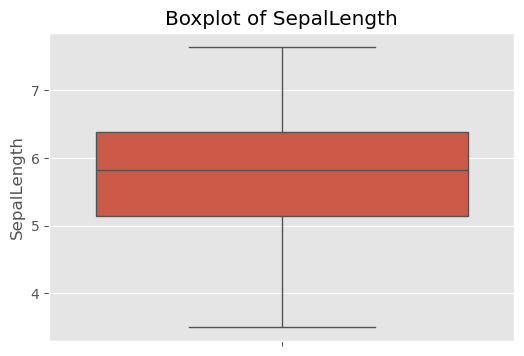

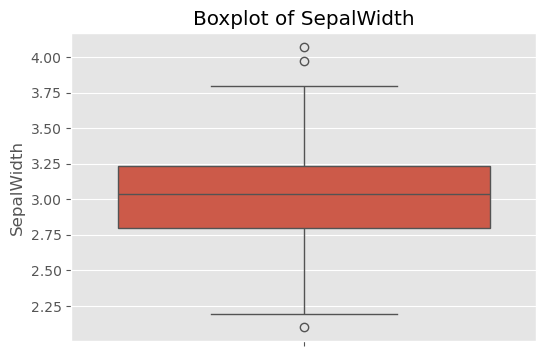

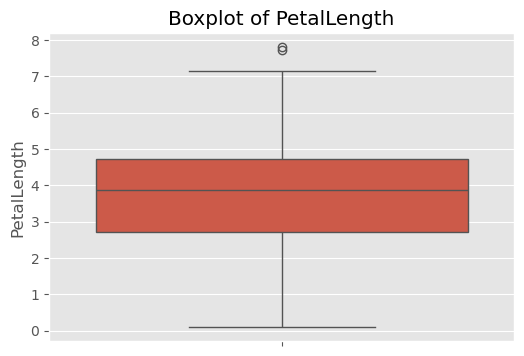

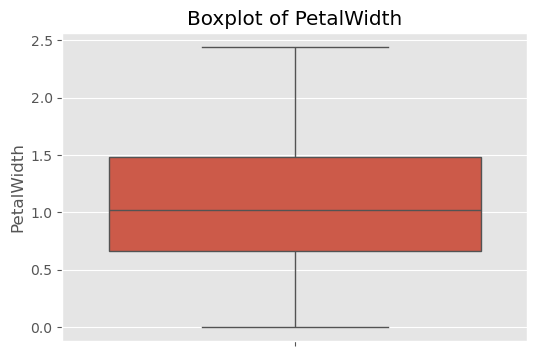

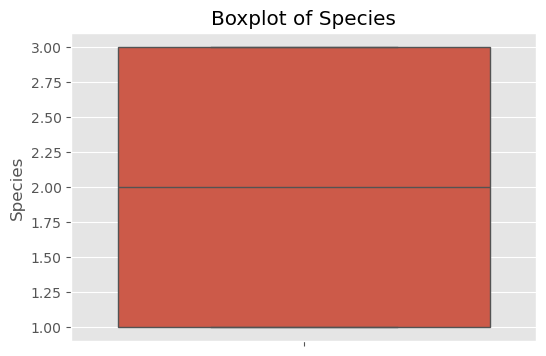

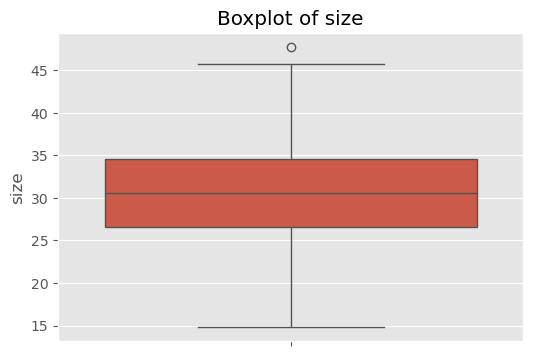

In [27]:
#looking for outliers
#boxplot
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.savefig(f'Boxplot of {col}')
    plt.show()

# 
outlier detection
1. almost no fig has very much outliers

In [28]:
#calculation for outliers
for c in df.columns:
    
    q1 = np.percentile(df[c],25)
    q3 = np.percentile(df[c],75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5*iqr
    upper_fence = q3 + 1.5*iqr
    print(f'lower_fence:{lower_fence} , upper_fence: {upper_fence}')

lower_fence:3.2837500000000004 , upper_fence: 8.25375
lower_fence:2.1512499999999997 , upper_fence: 3.88125
lower_fence:-0.2587500000000005 , upper_fence: 7.711250000000001
lower_fence:-0.5737499999999999 , upper_fence: 2.7162499999999996
lower_fence:-2.0 , upper_fence: 6.0
lower_fence:14.59625 , upper_fence: 46.646249999999995


In [29]:
df.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,size
SepalLength,1.000000,-0.038764,0.030483,-0.011686,0.008705,0.290948
SepalWidth,-0.038764,1.000000,-0.222604,0.110810,0.079564,-0.158537
PetalLength,0.030483,-0.222604,1.000000,0.047082,-0.068410,0.959304
PetalWidth,-0.011686,0.110810,0.047082,1.000000,-0.005233,0.132424
Species,0.008705,0.079564,-0.068410,-0.005233,1.000000,-0.059331
size,0.290948,-0.158537,0.959304,0.132424,-0.059331,1.000000


# corr()
1. no such correlation between these features

In [30]:
#seperating the rows acc to the species
df.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,size
0,6.20,3.280000,1.42,0.90,1,22.260000
1,6.38,3.040000,5.57,0.77,2,38.850000
2,7.64,3.038036,3.55,0.41,3,32.928036
3,6.66,2.760000,5.54,0.17,1,38.410000
4,4.28,3.350000,3.76,1.52,3,28.470000


In [31]:
# 'virginica': 1, 'setosa':2, 'versicolor': 3
for species, data in df.groupby('Species'):
    filename = f'{species}.csv'
    data.to_csv(filename, index = False)
    print(f'saved{filename}')

saved1.csv
saved2.csv
saved3.csv


In [32]:
#loding the dataset for better
import seaborn as sns
virginica = pd.read_csv('1.csv')
setosa = pd.read_csv('2.csv')
versicolor = pd.read_csv('3.csv')

In [33]:
virginica.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,size
0,6.20,3.28,1.42,0.90,1,22.26
1,6.66,2.76,5.54,0.17,1,38.41
2,7.25,2.56,4.26,1.49,1,35.59
3,5.30,3.03,3.10,1.17,1,27.20
4,6.18,3.14,4.49,0.79,1,34.25


In [34]:
virginica.shape

(48, 6)

In [35]:
virginica.isna().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
size           0
dtype: int64

In [36]:
virginica.mean()

SepalLength     5.729583
SepalWidth      2.987586
PetalLength     3.861875
PetalWidth      1.013333
Species         1.000000
size           30.907586
dtype: float64

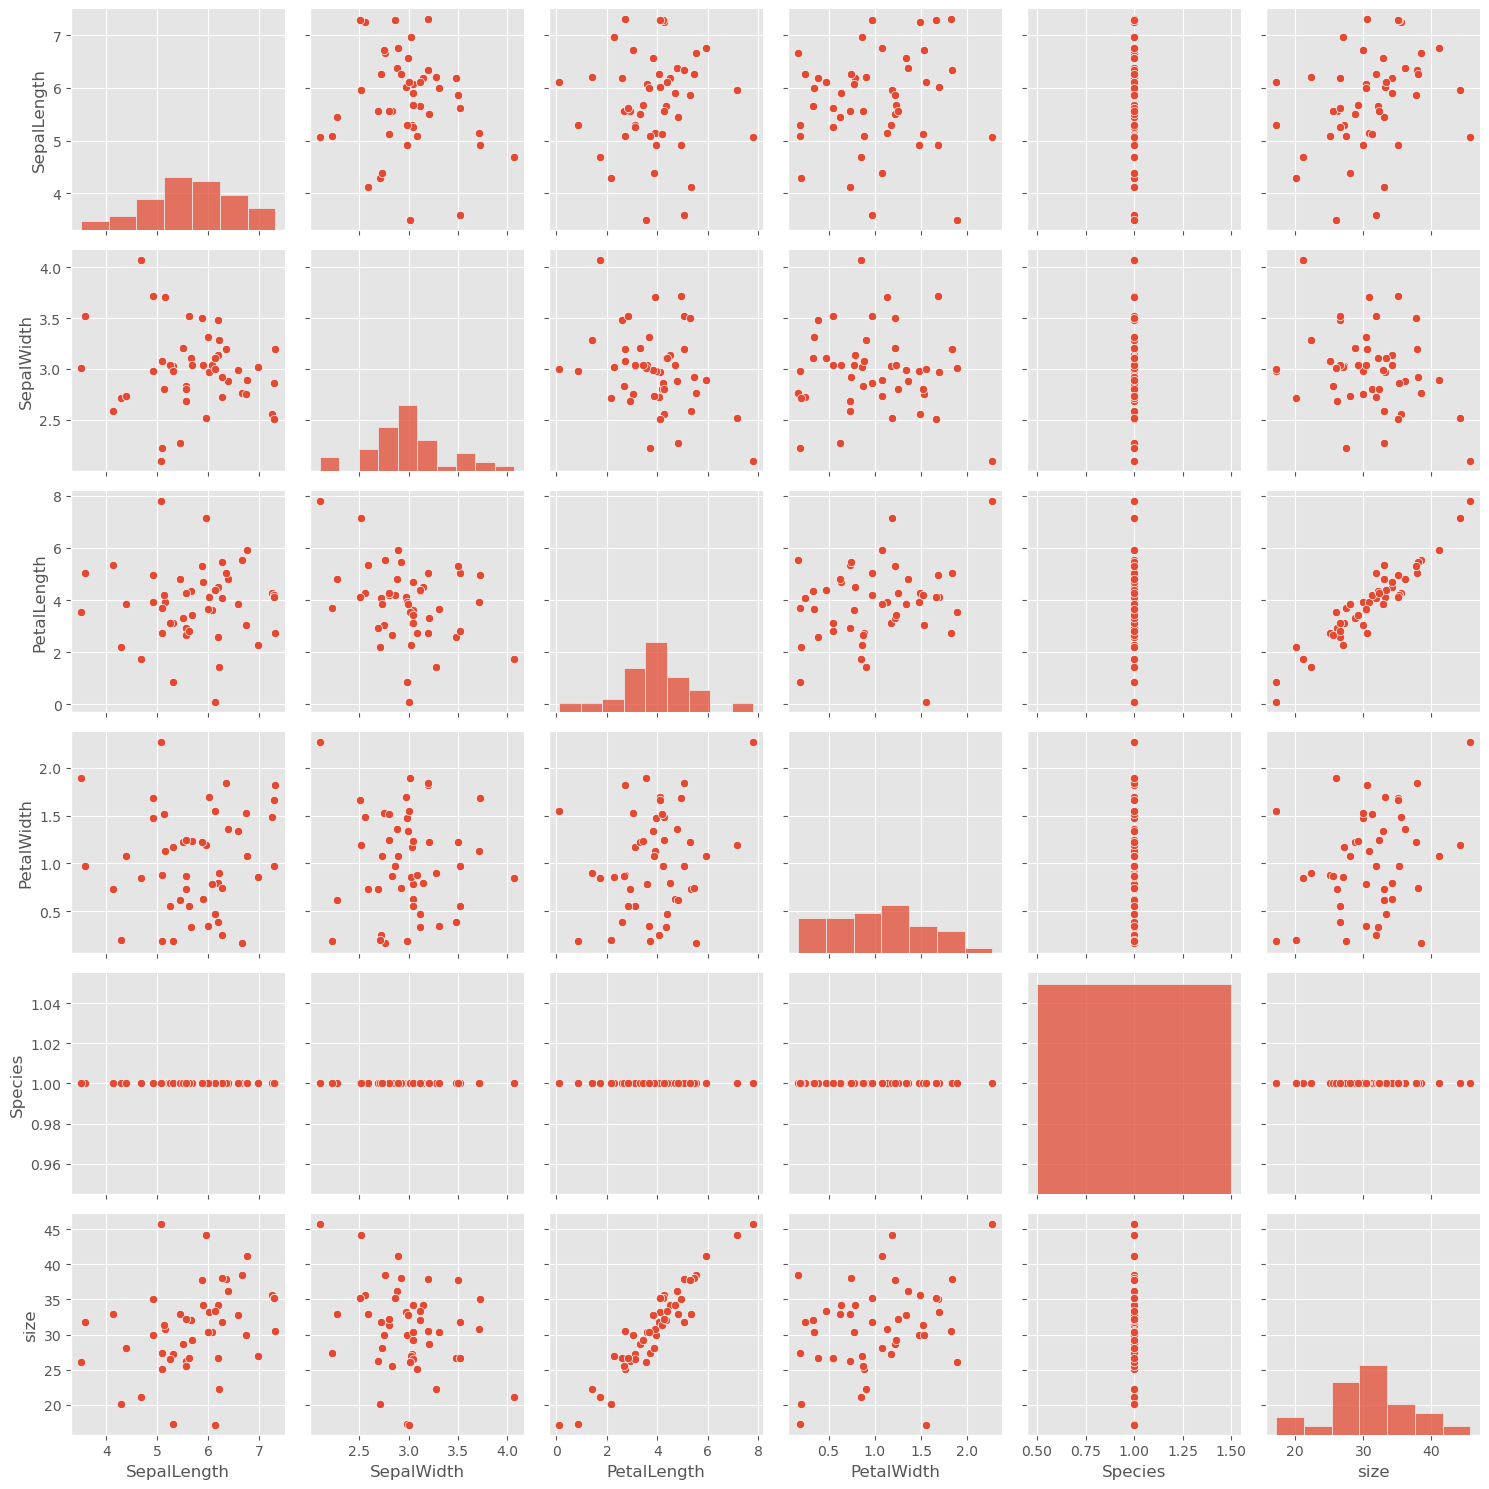

In [37]:
sns.pairplot(virginica)
plt.savefig('virginica_pairplot')
plt.tight_layout()
plt.show()

In [38]:
virginica.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,size
SepalLength,1.000000,-0.121960,0.015542,0.068516,NaN,0.311899
SepalWidth,-0.121960,1.000000,-0.329886,-0.043213,NaN,-0.288949
PetalLength,0.015542,-0.329886,1.000000,0.229506,NaN,0.949094
PetalWidth,0.068516,-0.043213,0.229506,1.000000,NaN,0.320717
Species,NaN,NaN,NaN,NaN,NaN,NaN
size,0.311899,-0.288949,0.949094,0.320717,NaN,1.000000


# obeservation
1. size and petallength highly linear, meaninig size is huge then petallength is also huge.
2. sepal width vs petal length, is negatively correlated meaning, not such linear relationship
3. 

TypeError: lineplot() got multiple values for argument 'data'

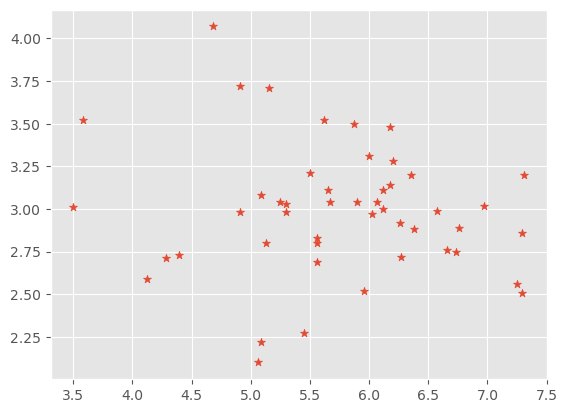

In [39]:
# line plot
plt.scatter('SepalLength', 'SepalWidth', data = virginica , marker = '*')
sns.lineplot('SepalWidth', data = virginica)

In [ ]:
sns.lmplot(x = 'SepalLength', y ='SepalWidth', data = virginica)
plt.savefig('lmplot_sl_sw_withoutCI')

In [ ]:
sns.lineplot(x = 'SepalWidth', y = 'size', data = virginica, )

In [ ]:
sns.lmplot(y = 'SepalWidth', x = 'size', data = virginica)

# sepalwidth vs size
wider the sepal smaller the size

In [ ]:
sns.lmplot(y = 'SepalLength', x = 'size', data = virginica)

# sepal legth vs size
sepal length increses , size also increases

In [ ]:
for  i in range(len(virginica.columns)-1):
    col_x = virginica.columns[i]
    col_y = virginica.columns[i+1]

    sns.lmplot(x = col_x, y = col_y, data = virginica, height = 4, aspect = 1.2)
    plt.title(f'Scatter Plot of {col_x} vs {col_y}') # Add a descriptive title
    plt.show()

# observation
1. petalWidth and petalLength is postively correlated, linear relation else are slightly -ve correlated

In [ ]:
#average 
mean_sw =np.mean(virginica['SepalWidth'])

mean_sw_s = np.mean(setosa['SepalWidth'])


if mean_sw > mean_sw_s:
    print('Virginica')
else:
    print('setosa')

In [ ]:
mean_sl =np.mean(virginica['SepalLength'])

mean_sl_s = np.mean(setosa['SepalLength'])

if mean_sl > mean_sl_s:
    print('Virginica')
else:
    print('setosa')

In [ ]:
#average 
mean_p =np.mean(virginica['PetalWidth'])

mean_p_s = np.mean(setosa['PetalWidth'])


if mean_p > mean_p_s:
    print('Virginica')
else:
    print('setosa')

In [ ]:
mean_p , mean_p_s

In [ ]:
mean_sw, mean_sw_s

In [ ]:
#average 
mean_pl =np.mean(virginica['PetalLength'])

mean_pl_s = np.mean(setosa['PetalLength'])


if mean_pl > mean_pl_s:
    print('Virginica')
else:
    print('setosa')

In [ ]:
#comparing the size of species
if(virginica['size'].mean() > setosa['size'].mean() > versicolor['size'].mean()):
    print('verginica :', virginica['size'].mean())
elif(setosa['size'].mean() >virginica['size'].mean() > versicolor['size'].mean()):
    print('setosa :', setosa['size'].mean())
else:
    print('versicolor :', versicolor['size'].mean())

verginica is larger than others

In [ ]:
setosa['size'].mean()

In [ ]:
versicolor['size'].mean()

# size compare
verginiva > setosa > versicolor


In [ ]:
df.columns

In [ ]:
#heatmap
sns.heatmap(df.corr(), facecolor= 'green', edgecolor = 'black', annot = True, cmap = 'coolwarm')
plt.savefig('heatmap')
plt.tight_layout()
plt.show()

# observation
1. sw and size is -ve correlated
2. sw and pl is -ve

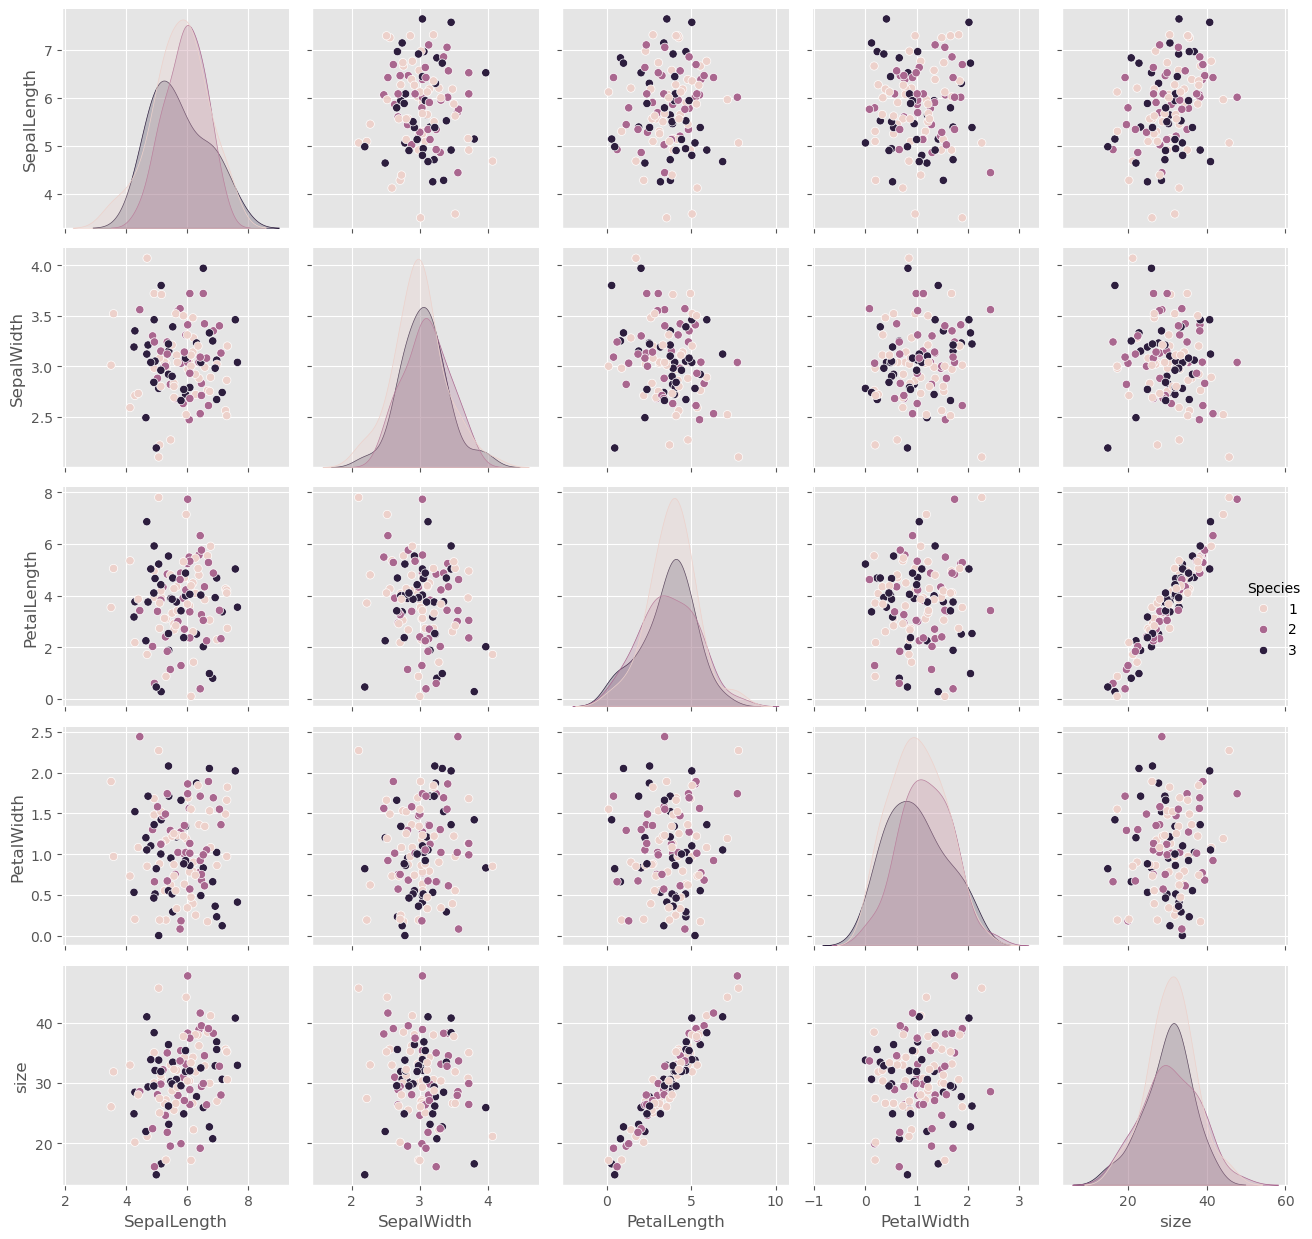

In [40]:
sns.pairplot(df, hue = 'Species')
plt.savefig('pairplot_sns')
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
#model training
# input and output
X = df[['PetalLength', 'PetalWidth', 'SepalLength', 'SepalWidth']]
y = df['Species']

In [42]:
#model 
#scaler
from sklearn.preprocessing import StandardScaler
#for X 
scaler_x = StandardScaler()
scaled_x = scaler_x.fit_transform(X)

# #for y 
# scaler_y = StandardScaler()
# scaled_y = scaler_x.fit_transform(y)

#Train, test, split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    scaled_x, y.ravel(), test_size=0.2, random_state=42, stratify=y
)


#model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

knn.fit(X_train, y_train)

#predict
y_pred = knn.predict(X_test)

#metrics
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


/tmp/ipykernel_1762/311324506.py:17: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  scaled_x, y.ravel(), test_size=0.2, random_state=42, stratify=y


Accuracy: 0.5416666666666666
              precision    recall  f1-score   support

           1       0.58      0.70      0.64        10
           2       0.60      0.43      0.50         7
           3       0.43      0.43      0.43         7

    accuracy                           0.54        24
   macro avg       0.54      0.52      0.52        24
weighted avg       0.54      0.54      0.54        24



In [43]:
y.ravel()

/tmp/ipykernel_1762/1610652532.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y.ravel()


array([1, 2, 3, 1, 3, 2, 1, 3, 2, 3, 1, 1, 2, 2, 2, 3, 3, 3, 2, 1, 1, 3,
       3, 1, 1, 3, 3, 1, 2, 3, 1, 1, 1, 1, 2, 1, 3, 2, 1, 2, 3, 1, 3, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1, 2, 2, 1, 3,
       2, 1, 1, 3, 3, 2, 3, 1, 1, 3, 3, 3, 3, 2, 3, 2, 1, 3, 2, 3, 1, 1,
       1, 3, 3, 2, 1, 3, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 3, 1,
       1, 2, 3, 3, 3, 3, 1, 3, 1, 1])

class 1  is not struggling
rest are struggling


# Linear Regression

In [44]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species',
       'size'],
      dtype='object')

In [57]:
from sklearn.model_selection import train_test_split
#spliting the dta
X = df[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)

#using standard scaler on the test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#model 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#accuracy and classification report
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.4583333333333333
              precision    recall  f1-score   support

           1       0.50      0.67      0.57        12
           2       0.33      0.20      0.25         5
           3       0.40      0.29      0.33         7

    accuracy                           0.46        24
   macro avg       0.41      0.38      0.38        24
weighted avg       0.44      0.46      0.44        24



In [58]:
#again feature scaling


In [59]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,size
0,6.20,3.280000,1.42,0.90,1,22.260000
1,6.38,3.040000,5.57,0.77,2,38.850000
2,7.64,3.038036,3.55,0.41,3,32.928036
3,6.66,2.760000,5.54,0.17,1,38.410000
4,4.28,3.350000,3.76,1.52,3,28.470000


In [62]:
for c in df.columns:
    mean = df[c].mean()
    print(f'mean of {c}:{round(mean, 2)} ')

mean of SepalLength:5.79 
mean of SepalWidth:3.04 
mean of PetalLength:3.73 
mean of PetalWidth:1.06 
mean of Species:1.9 
mean of size:30.58 


In [64]:
#verginica : 1
for c in virginica.columns:
    mean = virginica[c].mean()
    print(f'mean of {c}:{round(mean, 2)} ')

mean of SepalLength:5.73 
mean of SepalWidth:2.99 
mean of PetalLength:3.86 
mean of PetalWidth:1.01 
mean of Species:1.0 
mean of size:30.91 


In [69]:
#verginica : 1
for c in virginica.columns:
    mini = virginica[c].min()
    print(f'min of {c}:{mini} ')

min of SepalLength:3.5 
min of SepalWidth:2.1 
min of PetalLength:0.1 
min of PetalWidth:0.17 
min of Species:1 
min of size:17.19 


# mini size in vignica
1. min of SepalLength:3.5 <br>
min of SepalWidth:2.1 <br>
min of PetalLength:0.1 <br>
min of PetalWidth:0.17 <br>
min of Species:1 <br>
min of size:17.19 <br>

In [71]:
#for maximum
#verginica : 1
for c in virginica.columns:
    maxi = virginica[c].max()
    print(f'maxi of {c}:{maxi} ')


maxi of SepalLength:7.31 
maxi of SepalWidth:4.07 
maxi of PetalLength:7.8 
maxi of PetalWidth:2.27 
maxi of Species:1 
maxi of size:45.690000000000005 


# maximum
maxi of SepalLength:7.31 <br><hr>
maxi of SepalWidth:4.07 <br><hr>
maxi of PetalLength:7.8 <br><hr>
maxi of PetalWidth:2.27 <br><hr>
maxi of Species:1 <br><hr>
maxi of size:45.690000000000005 <br><hr>

In [76]:
for i in virginica.columns:
    diff = virginica[i].max() - virginica[i].min()
    print(f'Diff of {i} : {diff}')

Diff of SepalLength : 3.8099999999999996
Diff of SepalWidth : 1.9700000000000002
Diff of PetalLength : 7.7
Diff of PetalWidth : 2.1
Diff of Species : 0
Diff of size : 28.500000000000004


In [77]:
for i in setosa.columns:
    diff = setosa[i].max() - setosa[i].min()
    print(f'Diff of {i} : {diff}')

Diff of SepalLength : 2.6599999999999993
Diff of SepalWidth : 1.25
Diff of PetalLength : 7.340000000000001
Diff of PetalWidth : 2.36
Diff of Species : 0
Diff of size : 31.57803571428571


In [78]:
#setosa : 2
for c in setosa.columns:
    mini = setosa[c].min()
    print(f'min of {c}:{mini} ')

min of SepalLength:4.44 
min of SepalWidth:2.47 
min of PetalLength:0.39 
min of PetalWidth:0.08 
min of Species:2 
min of size:16.14 


In [79]:
#for maximum
#ssetosa
for c in setosa.columns:
    maxi = setosa[c].max()
    print(f'maxi of {c}:{maxi} ')


maxi of SepalLength:7.1 
maxi of SepalWidth:3.72 
maxi of PetalLength:7.73 
maxi of PetalWidth:2.44 
maxi of Species:2 
maxi of size:47.71803571428571 


# dimension reduction trying PCA
1. calculate mean of every feture
2. calculate the covariance matrix
3. calculate eigenvector and eigenvalue
4. choose pc
5. project data

In [121]:
X = df.drop(['Species', 'size'], axis = 1)
for c in X.columns:
    minimum = X[c].min()
    print(minimum)    

3.5
2.1
0.1
-0.0


In [122]:
#coviacne matrix
cov_matrix = X.cov()
cov_matrix

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,0.709813,-0.011647,0.039204,-0.005269
SepalWidth,-0.011647,0.127171,-0.121180,0.021149
PetalLength,0.039204,-0.121180,2.330262,0.038465
PetalWidth,-0.005269,0.021149,0.038465,0.286430


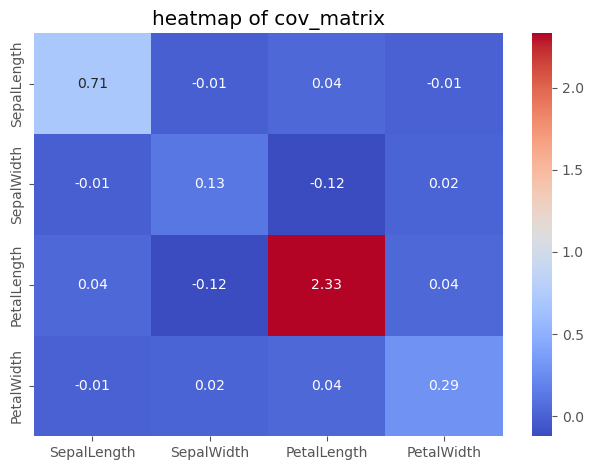

In [123]:
#projection cov
sns.heatmap(cov_matrix, annot = True, fmt =".2f", cmap = 'coolwarm')
plt.title('heatmap of cov_matrix')
plt.savefig('heatmap of cov_matrix')
plt.tight_layout()
plt.show()

# for pca
1. import sklearn.preprocessing and standardize , alsways at first
2. apply sklearn.decomposition and use pca
3. visulaize

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

In [125]:
#drop size 


In [126]:
#decomposition module
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(scaled)

In [127]:
#new datafram with pca result 
pca_df = pd.DataFrame(data = X_pca, columns = ['pca1', 'pca2', 'pca3'])
pca_df['Species'] = df['Species']

In [128]:
pca_df.head()

,pca1,pca2,pca3,Species
0,1.291312,-0.862716,0.739219,1
1,-1.025307,0.018645,0.499606,2
2,-0.631058,-1.223267,2.070418,3
3,-1.880336,-1.096967,0.616739,1
4,1.162745,0.959973,-1.556685,3


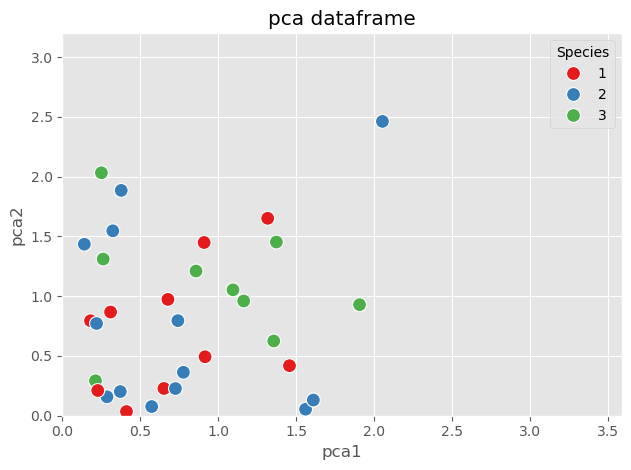

In [129]:
#ploting the graph for pca
sns.scatterplot(data = pca_df, x = 'pca1' , y = 'pca2', hue = 'Species', palette = 'Set1', s = 100)
plt.savefig('scatter plot of pca')
plt.title('pca dataframe')
plt.tight_layout()
plt.grid(True)
plt.xlim(0)
plt.ylim(0)
plt.show()

# oberservation
1. from 0 to 2 in pca 1, pca1 and pca2 is +ve corelated
2. at point 3.7 and 4 the pca 2 directly decreses, mean probably an outlers

In [130]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", sum(pca.explained_variance_ratio_))


Explained variance ratio: [0.31075717 0.25928637 0.24735392]
Total variance explained: 0.8173974503693051


# pca explained
1. 83% data was in account , 17% lost
2. 

In [131]:
#training model on pca datafram
from sklearn.model_selection import train_test_split
X = pca_df[['pca1', 'pca2', 'pca3']]
y = pca_df['Species']

#train test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#model selection

#LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#model evaluation
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("classification_report:\n ", classification_report(y_test, y_pred))

Accuracy:  0.375
classification_report:
                precision    recall  f1-score   support

           1       0.44      0.67      0.53        12
           2       0.33      0.20      0.25         5
           3       0.00      0.00      0.00         7

    accuracy                           0.38        24
   macro avg       0.26      0.29      0.26        24
weighted avg       0.29      0.38      0.32        24

